In [1]:
import numpy as np
import matplotlib.pyplot as plt

Jeu 1 : On parie sur une des deux couleurs une certaine mise.

In [2]:
def game(mise: float, p: float = 18/37, display: bool = False):
    res = 2 * mise * np.random.binomial(1, p)
    if display:
        print(res)
    return res

## 1. Premiers jeux

In [3]:
money = 10

Tant qu'on veut jouer, on clique : 

In [4]:
money = game(money, display=True)

20


## 2. Jeu jusqu'à perte

Jeu 2 : On a u0 euros qu'on joue jusqu'à ce qu'on perde à la roulette (sûr de perdre) mais on voit jusqu'à combien on peut monter.

In [5]:
u0 = 1

until_loss = [u0]
while until_loss[-1] > 0:
    until_loss.append(
        game(until_loss[-1])
    )

until_loss

[1, 2, 0]

## 3. Application de stratégie

Jeu 3 : Tant qu'on perd, on double la mise tant qu'on peut. Sinon on se retire.

In [6]:
MISES = []

# Initialisation
mise = 1
dernier_gain = game(mise, p=1/2)
MISES.append(mise)

# Jeu
while dernier_gain == 0:
    mise *= 2
    dernier_gain = game(mise, p=1/2)
    MISES.append(mise)

# Conclusion
seul_gain = dernier_gain
mise_totale = sum(MISES)
gain_total = seul_gain - mise_totale

f"Résumé : gain={seul_gain} | mise totale={mise_totale} | gain_total={gain_total}"

'Résumé : gain=2 | mise totale=1 | gain_total=1'

mise en fonction

In [7]:
def next_total_bets(bets: list[float]) -> float:
    return sum(bets) + bets[-1] * 2

def double_it_until_you_win(initial_bet: float = 1, p: float = 1/2, maximal_capital: float = np.inf):
    # Initialisation
    last_profit = game(initial_bet, p=p)
    BETS = [initial_bet]

    # Jeu
    while last_profit == 0 and next_total_bets(BETS) < maximal_capital:
        last_profit = game(BETS[-1] * 2, p=p)
        BETS.append(BETS[-1] * 2)

    only_bet = last_profit
    total_bet = sum(BETS)
    return only_bet, total_bet

mise_initiale = 10
seul_gain, mise_totale = double_it_until_you_win(mise_initiale, p=5/37, maximal_capital=100)
gain_total = seul_gain - mise_totale

f"Résumé : gain={seul_gain} | mise totale={mise_totale} | gain_total={gain_total}"

'Résumé : gain=0 | mise totale=70 | gain_total=-70'

In [8]:
def extr(list, k):
    return [sub_list[k] for sub_list in list]

Jeu 4 : Tant qu'on perd, on double la mise tant qu'on peut. Si on perd ou qu'on atteint un seuil de retire on se retire.
Question d'optimisation : à combien se retire-t-on pour gagner le plus possible (potentiellement perdre le moins possible et alors on concluera que jouer ets à perte.).

Capital de sortie du casino = 2000€


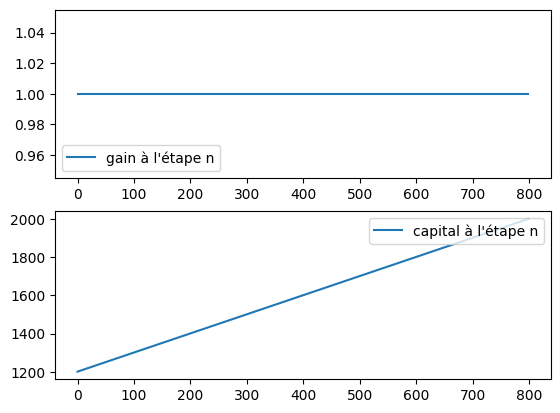

In [9]:
capital = 1200
cahout_treshold = 2000

mise_a_chaque_jeu = 1
p = 18/37

games = []
while 0 < capital < cahout_treshold:
    gain, mise_totale = double_it_until_you_win(  # tant qu'on a du capital, on joue
        initial_bet=mise_a_chaque_jeu,
        p=p,
        maximal_capital=capital,
    )
    gain_total = gain - mise_totale
    capital = max(0, capital + gain_total)
    games.append(
        [gain, mise_totale, gain_total, capital]
    )

print(f"Capital de sortie du casino = {capital}€")

plt.subplot(211)
plt.plot(extr(games, 2), label="gain à l'étape n")
plt.legend(loc=3)

plt.subplot(212)
plt.plot(extr(games, 3), label="capital à l'étape n")
plt.legend(loc=1)



Mise en fonction du jeu 4 :

In [10]:
def game_4(game_bet: float = 1, p: float = 18/37, capital: float = 1200, cashout_treshold: float = 2000):
    games = []
    while 0 < capital < cashout_treshold:
        gain, mise_totale = double_it_until_you_win(
            initial_bet=game_bet,
            p=p,
            maximal_capital=capital,
        )
        gain_total = gain - mise_totale
        capital = max(0, capital + gain_total)
        games.append(
            [gain, mise_totale, gain_total, capital]
        )
    return games

In [11]:
games = game_4(
    game_bet=1,
    p=18/37,
    capital=1200,
    cashout_treshold=2000,
)

capital = extr(games, 3)[-1]
print(f"Capital de sortie du casino = {capital}€")

Capital de sortie du casino = 0€


Expérience sur plusieurs séries : 

In [12]:
mise_initiale = 1200
seuil_de_retrait = 2000  # valeur à optimiser
mise_d_entree = 1  # multiple du jeu (en vrai, c'est important)

GAMES_4_LIST = [
    game_4(
        game_bet=mise_d_entree,
        p=18/37,
        capital=mise_initiale,
        cashout_treshold=seuil_de_retrait,
    )
    for _ in range(100)
]

# chaque valeur représente une sortie du casino
exit_capitals = [extr(game, 3)[-1] - mise_initiale for game in GAMES_4_LIST]
esperance = np.mean(exit_capitals)

# Probabilité intrinsèque
p = (esperance + mise_initiale) / seuil_de_retrait

print(f"Espérance des jeux : {esperance}\nProbabilité intrinsèque : {p}")

Espérance des jeux : -180.0
Probabilité intrinsèque : 0.51


Mise en fonction :

In [31]:
def expected_value_game_4(seuil_de_retrait, mise_initiale: float = 1200, mise_d_entree: float = 1, p: float = 18/37, N: int = 100):
    GAMES_4_LIST = [
        game_4(
            game_bet=mise_d_entree,
            p=p,
            capital=mise_initiale,
            cashout_treshold=seuil_de_retrait,
        )
        for _ in range(N)
    ]
    try:
        exit_capitals = [extr(game, 3)[-1] - mise_initiale for game in GAMES_4_LIST]
        esperance = np.mean(exit_capitals)
        p = (esperance + mise_initiale) / seuil_de_retrait
    except:
        esperance, p = np.nan, np.nan
    return esperance, p

seuil_de_retrait = 2000  # valeur à optimiser
expected_value_game_4(seuil_de_retrait, N=2000)

(np.float64(-287.0), np.float64(0.4565))

Optimisation :

In [27]:
N = 10000
seuil_de_retrait_values = range(1200, 3000, 50)

expectancy = [
    expected_value_game_4(seuil_de_retrait, N=N)
    for seuil_de_retrait in seuil_de_retrait_values
]

Jeu déséquilibré :

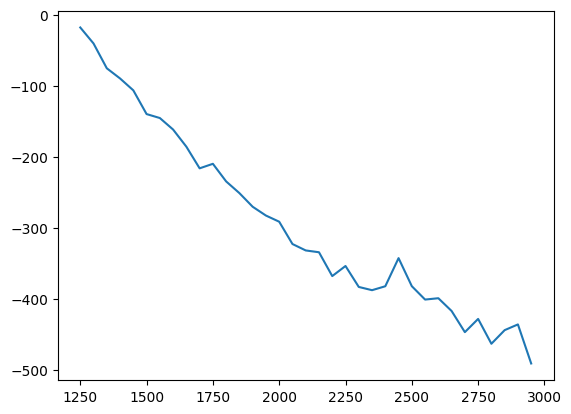

In [30]:
plt.plot(seuil_de_retrait_values, extr(expectancy, 0))

Jeu équilibré :

In [33]:
N = 1000
seuil_de_retrait_values = range(1200, 3000, 50)

expectancy = [
    expected_value_game_4(seuil_de_retrait, p=1/2, N=N)
    for seuil_de_retrait in seuil_de_retrait_values
]

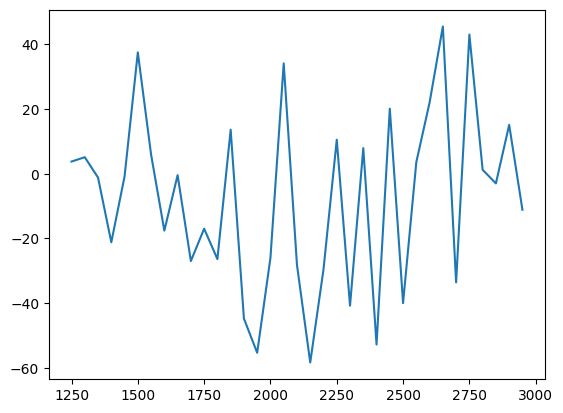

In [34]:
plt.plot(seuil_de_retrait_values, extr(expectancy, 0))